In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.append('abs_path_to_the_current_project')
from performance import PFPerformanceCOCOA

### The colors we are using

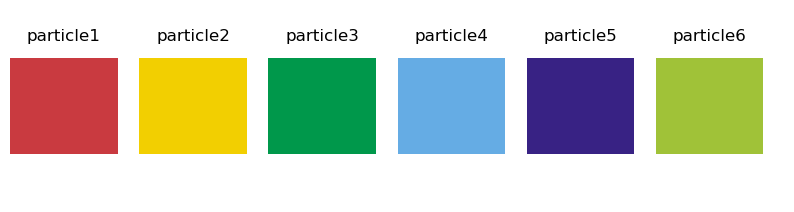

In [3]:
colors = [(201, 58, 64), (242, 207, 1), (0, 152, 75), (101, 172, 228),(56, 34, 132), (160, 194, 56)]
colors = [(r/255, g/255, b/255) for r, g, b in colors]  # Normalize to [0, 1]

fig, ax = plt.subplots(1, 1, figsize=(10, 2.5))

for i, color in enumerate(colors):
    rect = patches.Rectangle((i*1.2, 0.5), 1, 1, facecolor=color)
    ax.add_patch(rect)
    ax.text(i*1.2 + 0.5, 1.8, f'particle{i+1}', fontsize=12, va='top', ha='center')

ax.set_xlim(0, len(colors)*1.2)
ax.set_ylim(0, 2)
ax.axis('off')  # Hide axes
plt.show()

### Files to compare

In [4]:
sr_inf_path = 'path_to_pf_ed_test_pred.root'
low_pf_pred_path = 'path_to_pf_ed_test_low.root'
high_pf_pred_path = 'path_to_pf_ed_test_high.root'

### Load the usual Super Resolution performance object

In [5]:
performance = PFPerformanceCOCOA(sr_inf_path, low_pf_pred_path, high_pf_pred_path, res_factor=4)

loading ensemble components: 100%|██████████| 16/16 [00:00<00:00, 368730.02it/s]


In [6]:
# swapping colors
performance.pf_colors[1], performance.pf_colors[3] = performance.pf_colors[3], performance.pf_colors[1]

### What events to plot?

In [7]:
cherry_mask = (performance.truth_cardinality != performance.low_cardinality) * (performance.truth_cardinality == performance.high_cardinality)
cherry_mask = cherry_mask * (performance.truth_cardinality == 3)

cherry_idxs = np.where(cherry_mask)[0]
cherry_idxs

array([ 83, 193, 252, 279, 329, 366, 438, 458, 549, 551, 561, 572])

### update it with the 

In [8]:
performance.truth_part_e[252], performance.truth_part_dep_e[252], performance.low_part_e[252], performance.high_part_e[252]

(array([69251.1328125, 18498.5078125, 52742.8046875]),
 array([68325.96875   , 16412.99609375, 50526.1875    ]),
 array([66040.40625 ,     0.      , 71211.921875]),
 array([71543.59375   , 16570.67382812, 46267.796875  ]))

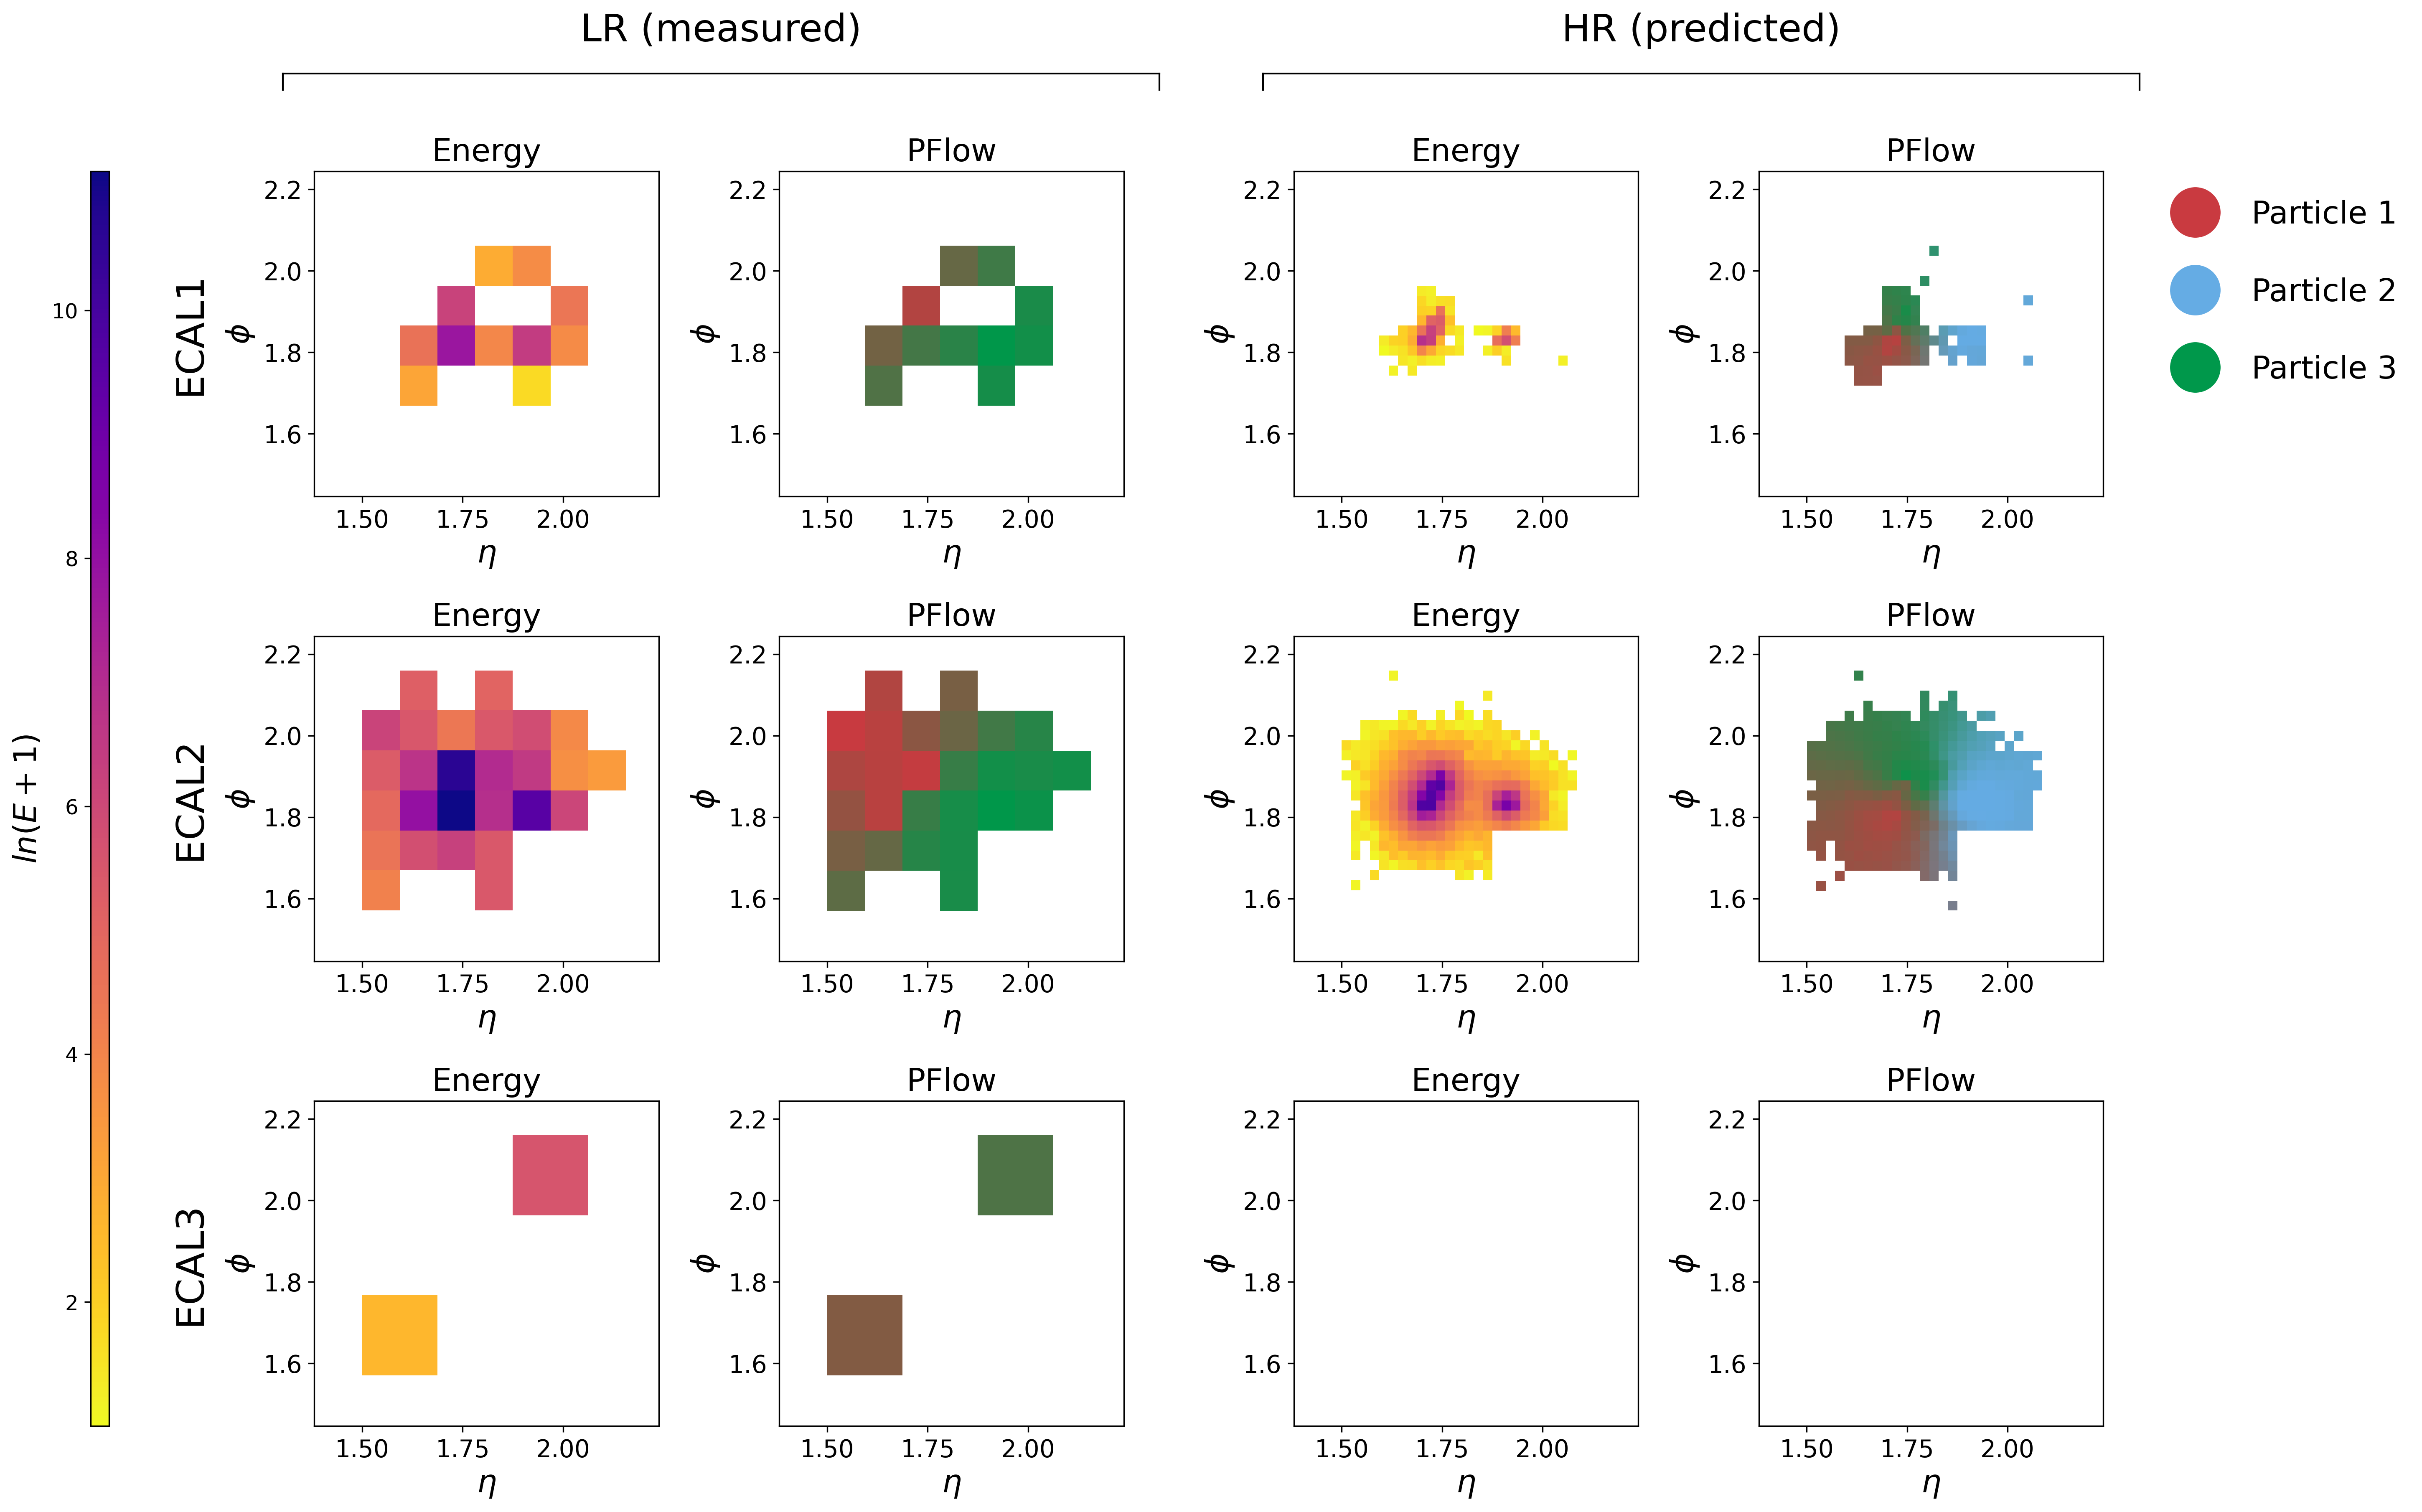

In [11]:
eds_to_plot = [252] # cherry_idxs
for i in eds_to_plot:
    _ = performance.plot_pf_event_display(i, verbose=False)

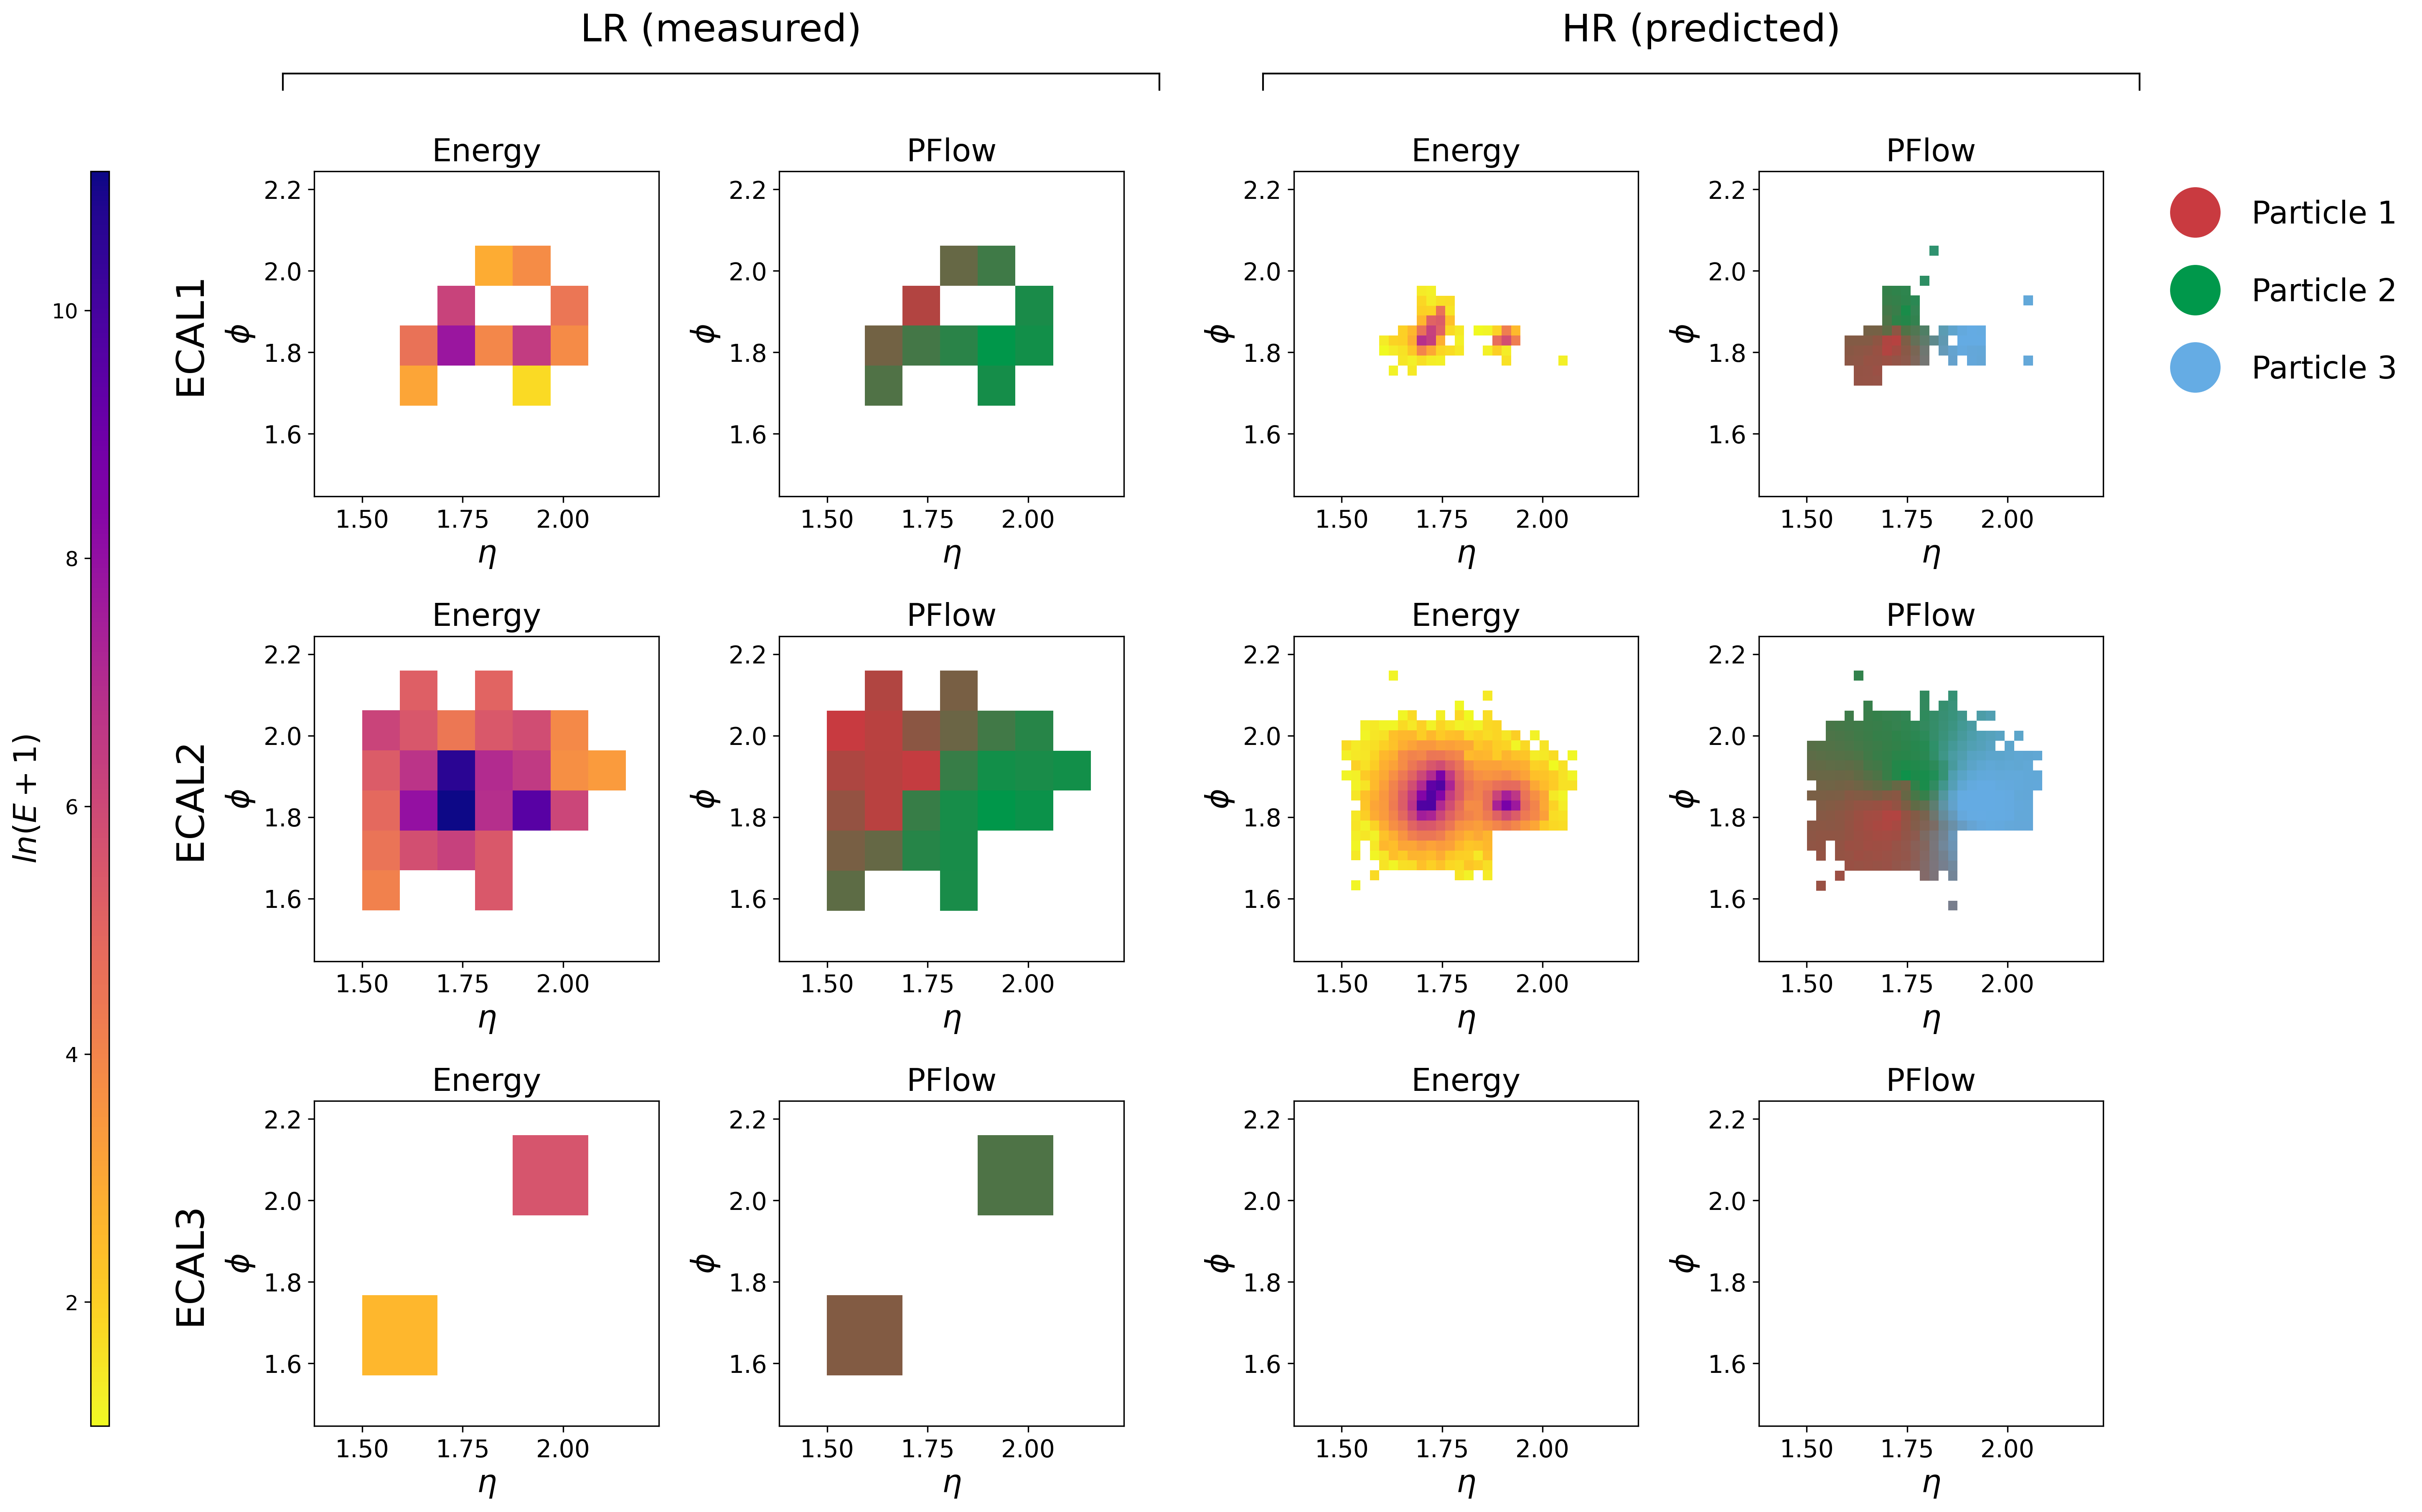

In [10]:
eds_to_plot = [252] # cherry_idxs
for i in eds_to_plot:
    _ = performance.plot_pf_event_display_v2(i, verbose=False)

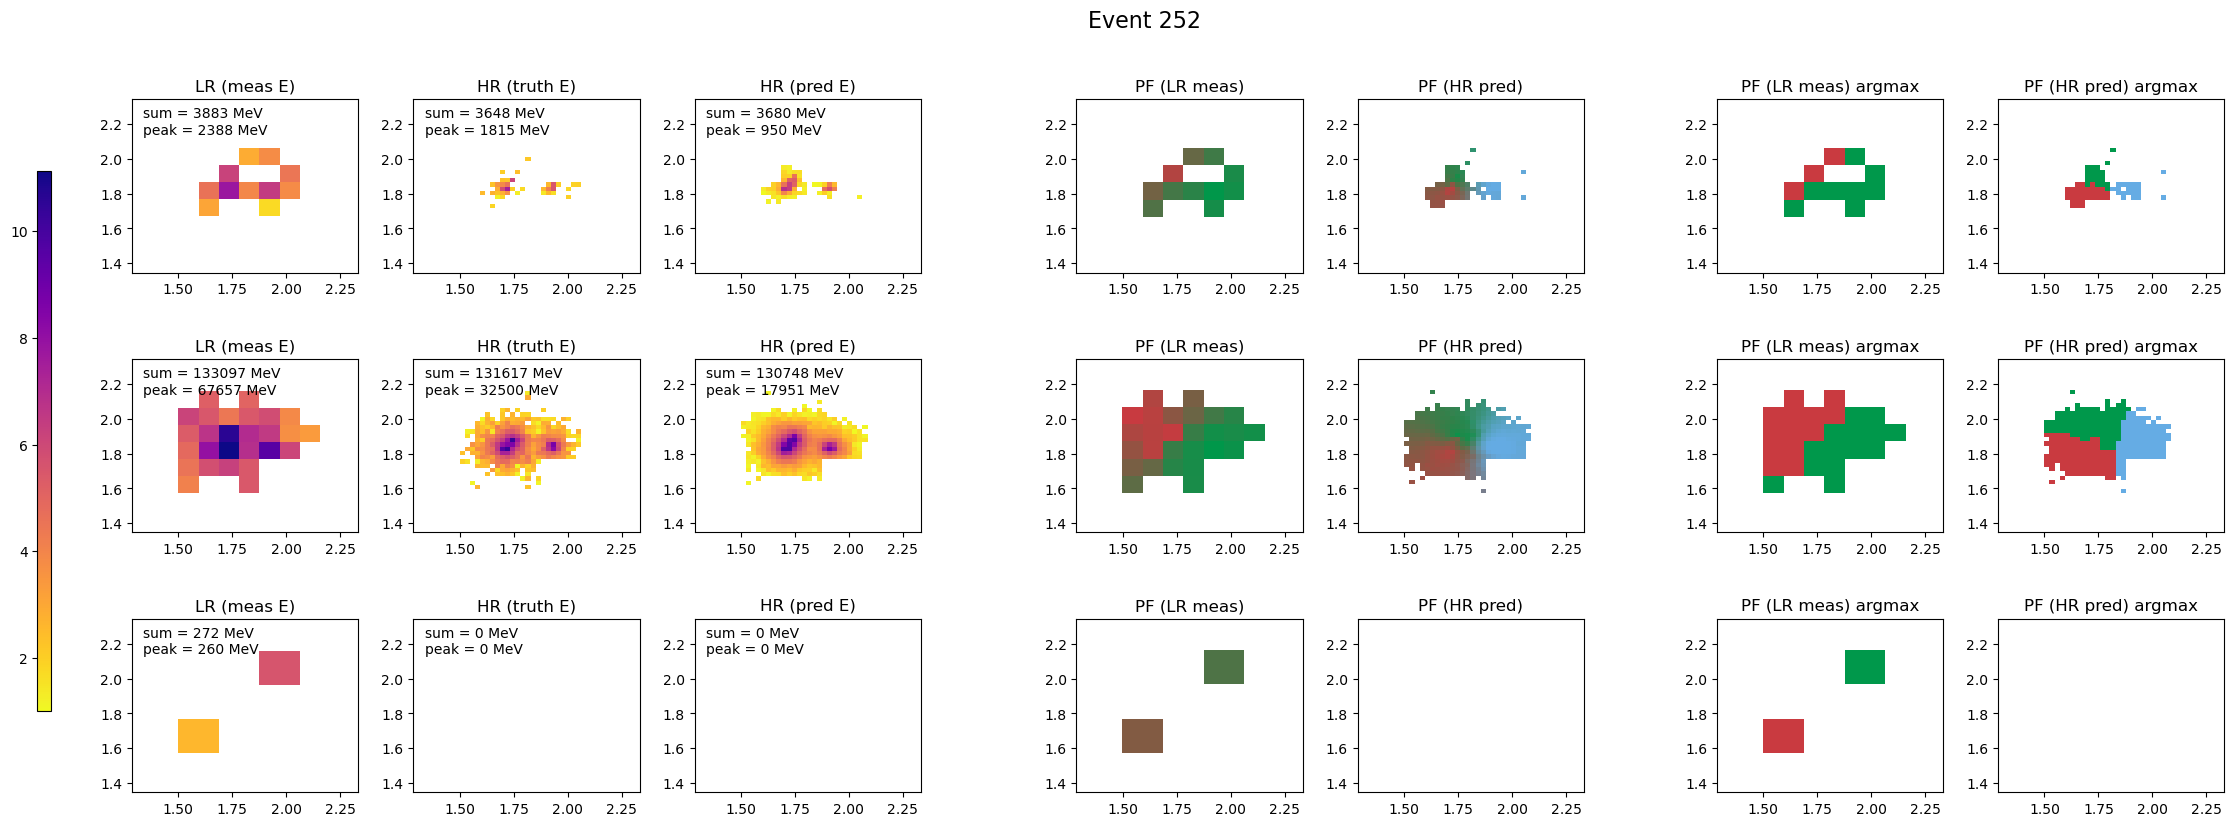

In [47]:
_ = performance.plot_pf_event_display_old(252, verbose=False)